In [2]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np
import scipy.stats



#A function to annotate a scatter plot
def annotate_scatter(x,y,label,data,fontsize=14,right_offset=0,down_offset=0):
    """
    Function to annotate a scatter plot
    
    Input:
    x: name of variable in x axis
    y: name of variable in y axis
    label: name of variable with the labels
    data: dataframe
    fontsize (default 14): font size
    
    """
       
    for label,x,y in zip(data[label],data[x],data[y]):
        plt.annotate(label,(x+right_offset,y+down_offset),fontsize=fontsize)

/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Gender bias in college admissions. Simpson's paradox
In 1973, UC Berkeley was sued for gender bias, because their graduate school admission figures showed obvious bias against women

Bickel, P. J., Hammel, E. A., & O’Connell, J. W. (1975). Sex bias in graduate admissions: Data from Berkeley. Science, 187(4175), 398–404. http://doi.org/10.1126/science.187.4175.398↩

In [3]:
#Let's read the data
df = pd.read_csv("./data/UCBerkeley.csv",index_col=0)
df.head()

,Admit,Gender,Dept,Freq
1,Admitted,Male,A,512
2,Rejected,Male,A,313
3,Admitted,Female,A,89
4,Rejected,Female,A,19
5,Admitted,Male,B,353


In [4]:
#And find the association between admission and gender
by_gender = pd.crosstab(df["Admit"],df["Gender"],values=df["Freq"],aggfunc=sum)
by_gender

Gender,Female,Male
Admit,,
Admitted,557,1198
Rejected,1278,1493


In [5]:
pd.crosstab(df["Admit"],df["Gender"],values=df["Freq"],aggfunc=sum,normalize="columns")

Gender,Female,Male
Admit,,
Admitted,0.303542,0.445188
Rejected,0.696458,0.554812


In [6]:
#Do the statistics
chi,p,dof,expected = scipy.stats.chi2_contingency(by_gender)
print('p-value', p)

p-value 1.0557968087828395e-21


## Is there a gender bias in the admissions?
- What could be happening?
- Are we ommiting any variable?

In [49]:
#And find the association between admission and gender and dept
by_gender_dept = pd.crosstab(df["Admit"],[df["Dept"],df["Gender"]],values=df["Freq"],aggfunc=sum)
by_gender_dept

Dept          A           B           C           D           E           F  \
Gender   Female Male Female Male Female Male Female Male Female Male Female   
Admit                                                                         
Admitted     89  512     17  353    202  120    131  138     94   53     24   
Rejected     19  313      8  207    391  205    244  279    299  138    317   

Dept           
Gender   Male  
Admit          
Admitted   22  
Rejected  351

In [8]:
#And find the association between admission and gender
pd.crosstab(df["Admit"],[df["Dept"],df["Gender"]],values=df["Freq"],aggfunc=sum,normalize="columns")

Dept             A                B                   C                   D  \
Gender      Female      Male Female      Male    Female      Male    Female   
Admit                                                                         
Admitted  0.824074  0.620606   0.68  0.630357  0.340641  0.369231  0.349333   
Rejected  0.175926  0.379394   0.32  0.369643  0.659359  0.630769  0.650667   

Dept                       E                   F            
Gender        Male    Female      Male    Female      Male  
Admit                                                       
Admitted  0.330935  0.239186  0.277487  0.070381  0.058981  
Rejected  0.669065  0.760814  0.722513  0.929619  0.941019

In [9]:
##Let's find the size of the departments
size_dept = df.loc[df["Admit"]=="Admitted"].groupby("Dept").sum().reset_index()
size_dept.columns = ["Dept","Size_dept"]
size_dept.head()

,Dept,Size_dept
0,A,601
1,B,370
2,C,322
3,D,269
4,E,147


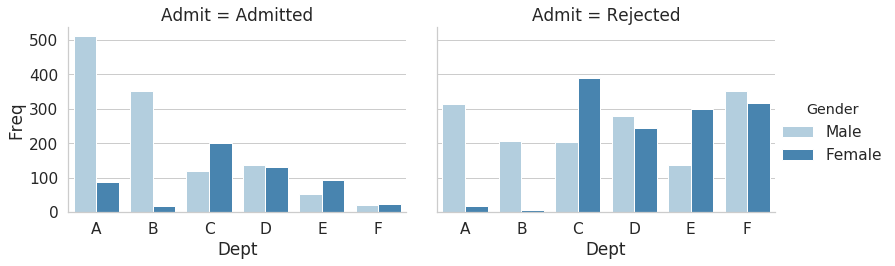

In [37]:
sns.set(font_scale=1.4)
sns.set_style('whitegrid')
sns.catplot(x="Dept",y="Freq",hue="Gender",col="Admit",data=df,kind="bar",
            aspect=1.4,height=4,palette="Blues")



In [20]:
##Find the percentage of admitted by gender and department
df["Total"] = df.groupby(["Dept","Gender"])["Freq"].transform(np.sum)
df["Frac"] = df["Freq"]/df["Total"]
df.head()

,Admit,Gender,Dept,Freq,Total,Frac
1,Admitted,Male,A,512,825,0.620606
2,Rejected,Male,A,313,825,0.379394
3,Admitted,Female,A,89,108,0.824074
4,Rejected,Female,A,19,108,0.175926
5,Admitted,Male,B,353,560,0.630357


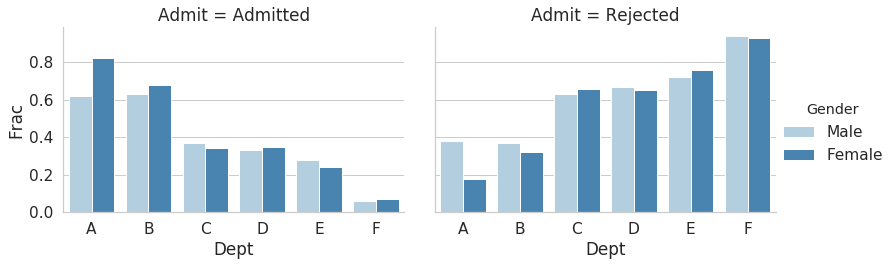

In [36]:
sns.catplot(x="Dept",y="Frac",hue="Gender",col="Admit",data=df,kind="bar",
            aspect=1.4,height=4,palette="Blues")

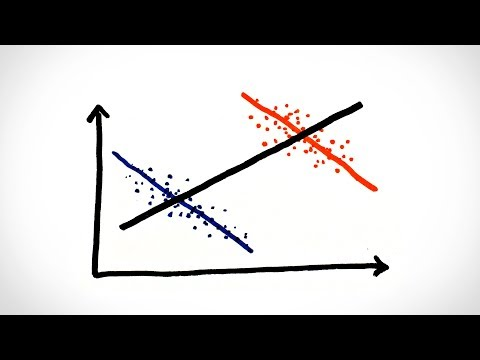

In [78]:
from IPython.display import YouTubeVideo
YouTubeVideo("ebEkn-BiW5k")

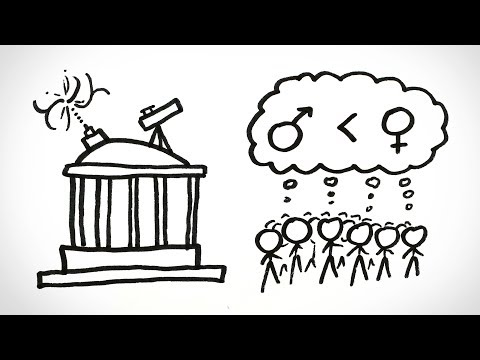

In [79]:
YouTubeVideo("E_ME4P9fQbo")